### **图像连通域分析**

* 图像的连通域指图像中**具有相同像素值**并且**位置相邻的像素组成的区域**，连通域分析指的是在图像中寻找彼此相互独立的连通域并将其标记出来，常用于车牌识别、文字识别、目标检测等

* 图像的邻域分为4邻域和8邻域，定义方式不同，判断的连通域也不同，因此一定要本声明是在哪种邻域条件下分析得到的结果

* 常见的图像邻域分析方法有**两遍扫描法**和**种子填充法**

* 两遍扫描法会遍历两次图像，第一次遍历会给非零像素赋予一个数字标签，当左上方和上侧像素有标签时取最小值作为当前像素的标签，否则赋予一个新的标签；第二次遍历，如果像素值大于1，找到与其像素值相等的像素的标签最小值赋予它

* 种子填充法首先将所有非零像素放到一个集合中，然后从集合中随机选一个像素作为种子像素，根据邻域方法不断扩充，并删除扩充的像素，直到种子像素所在的连通域无法扩充，然后再随机选一个像素作为新的种子像素、重复上述过程直至集合中没有像素

* cv.connectedComponentsWithAlgorithm()函数用于计算二值化图像中连通域的个数，目前只支持BBDT（两遍扫描法）和SAUF（种子填充法），第四个像素可以选择的标志为：
  * cv.CCL_WU 8邻域使用SAUF算法，4邻域使用SAUF算法
  * cv.CCL_GRANA 8邻域使用BBDT算法，4邻域使用SAUF算法

* cv.connectedComponentsWithAlgorithm()函数所有参数都没有默认值，使用中需要设置全部参数，增加了难度，简易版为cv.connectedComponents()

* labels的默认值为None，connectivity的默认值为8，ltype的默认值为cv.CV_32S，极大地方便了调用

In [40]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [41]:
# 生成随机颜色的函数
def generate_random_color():
    return np.random.randint(0, 256, 3)

In [42]:
# 填充颜色的函数
def fill_color(img1, img2, count):
    # 获取图像的宽和高
    h, w = img1.shape
    res = np.zeros((h, w, 3), img1.dtype)
    # 生成随机颜色
    random_color = {}
    # count为连通域的个数
    # 从1开始，是因为统计连通域的时候会将背景的黑色也统计进来，但我们并没有对黑色的背景进行处理
    for c in range(1, count):
        random_color[c] = generate_random_color()
    # 为不同的连通域填色
    for i in range(h):
        for j in range(w):
            item = img2[i][j]
            if item == 0:
                pass
            else:
                res[i, j, :] = random_color[item]
    return res

In [43]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'rice.png', cv.IMREAD_GRAYSCALE)
if img is None:
    print('Failed to read rice.png')
    sys.exit

In [44]:
# 将图像转换为二值图像，同时将黑白区域互换
# 二值化的阈值设置为50
rice_BW = cv.threshold(img, 50, 255, cv.THRESH_BINARY)
# 统计连通域
count, res = cv.connectedComponents(rice_BW[1], ltype=cv.CV_16U)
# 以不同的颜色白哦基础不同的连通域
result = fill_color(img, res, count)

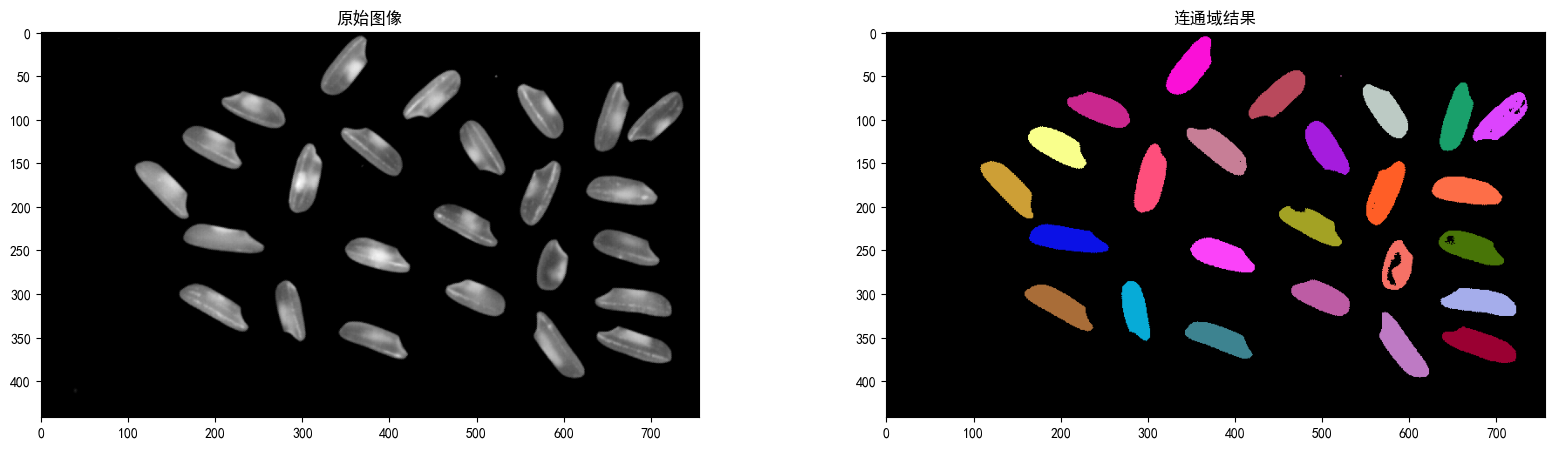

In [45]:
# 展示结果
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('原始图像')
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('连通域结果')
plt.imshow(result[:, :, [2, 1, 0]])